In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#importing dataset to a dataframe
df = pd.read_csv('../data/mandi_prices.csv')

BASIC EXPLORATORY DATA ANALYSIS(EDA)

In [ ]:
df.info()  
df.isnull().sum() #checking for any null value
#we conclude that there is no missing value in the data

In [5]:
#changing column names for better readibility
df.rename(columns={
    'Min_x0020_Price': 'Min_Price',
    'Max_x0020_Price': 'Max_Price',
    'Modal_x0020_Price': 'Modal_Price'
}, inplace=True)
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date']) #changing datatype of arrival_date from str to datetime

In [11]:
df.describe()

,Arrival_Date,Min_Price,Max_Price,Modal_Price
count,18838,18838.000000,18838.000000,18838.000000
mean,2025-04-04 00:00:00,3828.726178,4493.997324,4278.119560
min,2025-04-04 00:00:00,0.000000,0.000000,2.000000
25%,2025-04-04 00:00:00,1740.000000,2000.000000,2000.000000
50%,2025-04-04 00:00:00,3000.000000,3400.000000,3160.000000
75%,2025-04-04 00:00:00,4986.250000,5545.750000,5400.000000
max,2025-04-04 00:00:00,118000.000000,130000.000000,120000.000000
std,NaN,4536.728717,5314.417416,4940.495762


In [6]:
#checking unique values in my dataset
print("Unique States:", df['State'].nunique())
print("Unique Districts:", df['District'].nunique())
print("Unique Markets:", df['Market'].nunique())
print("Unique Commodities:", df['Commodity'].nunique())
print("Unique Grades:", df['Grade'].nunique())
print("Unique Varieties:", df['Variety'].nunique())

Unique States: 27
Unique Districts: 444
Unique Markets: 1479
Unique Commodities: 219
Unique Grades: 6
Unique Varieties: 461


In [5]:
#top 'n' frequent items for more easy use in analysis later
df['State'].value_counts().head(10)


State
Tamil Nadu          6642
Uttar Pradesh       2924
Madhya Pradesh      1770
Kerala              1344
Gujarat              880
Maharashtra          879
Punjab               744
Haryana              697
West Bengal          539
Himachal Pradesh     459
Name: count, dtype: int64

In [25]:
df['Market'].value_counts().head(10)

Market
Tiruvannamalai(Uzhavar Sandhai )      68
Hosur(Uzhavar Sandhai )               66
Vellore                               65
Anna nagar(Uzhavar Sandhai )          65
Ammapet(Uzhavar Sandhai )             63
Thathakapatti(Uzhavar Sandhai )       63
RSPuram(Uzhavar Sandhai )             63
Kahithapattarai(Uzhavar Sandhai )     61
Sooramangalam(Uzhavar Sandhai )       61
Jameenrayapettai(Uzhavar Sandhai )    61
Name: count, dtype: int64

In [7]:
df['Commodity'].value_counts().head(10)

Commodity
Wheat           850
Onion           675
Tomato          650
Potato          647
Brinjal         576
Green Chilli    545
Banana          438
Cabbage         436
Bottle gourd    429
Cauliflower     421
Name: count, dtype: int64

OBJECTIVE 1: STATE-WISE MARKET PERFORMANCE
Identify which states have the most active markets based on the number of recorded transactions.

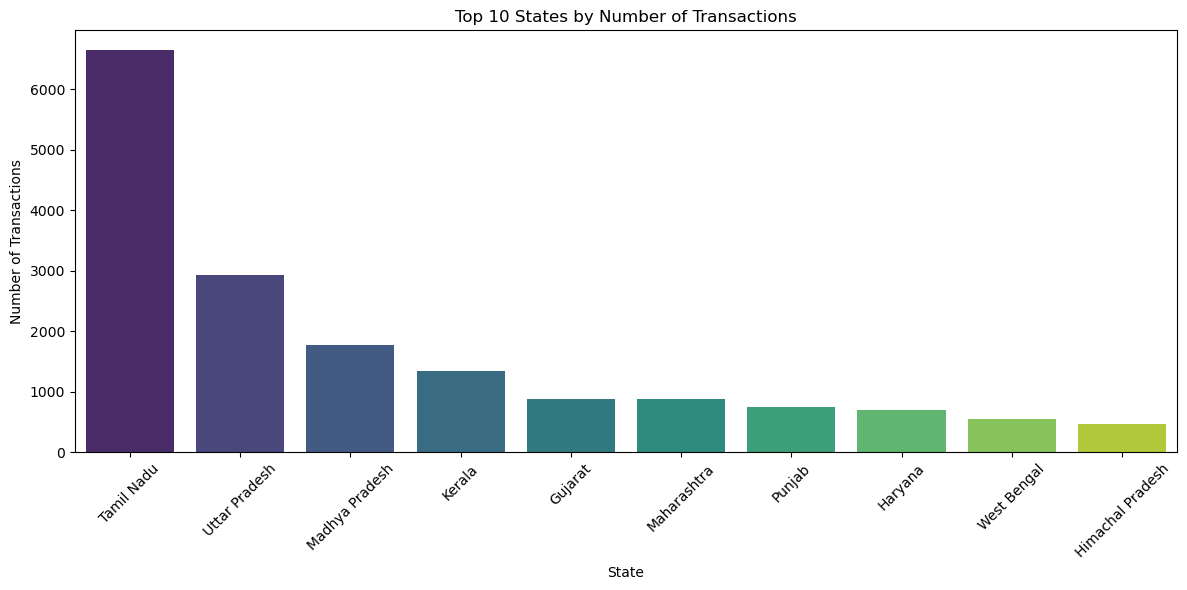

In [7]:
#top 10 states by market performance
top_states = df['State'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_states.index, y=top_states.values, hue=top_states.index, palette='viridis', legend=False)
plt.title("Top 10 States by Number of Transactions")
plt.xlabel("State")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


OBJECTIVE 2: PRICE-STABILITY ACROSS MARKETS
Analyzing how much the prices fluctuate across markets for different commodities.

In [8]:
# Clean unwanted text from 'Market'
df['Market'] = df['Market'].str.replace(r'\(.*?\)', '', regex=True).str.strip()

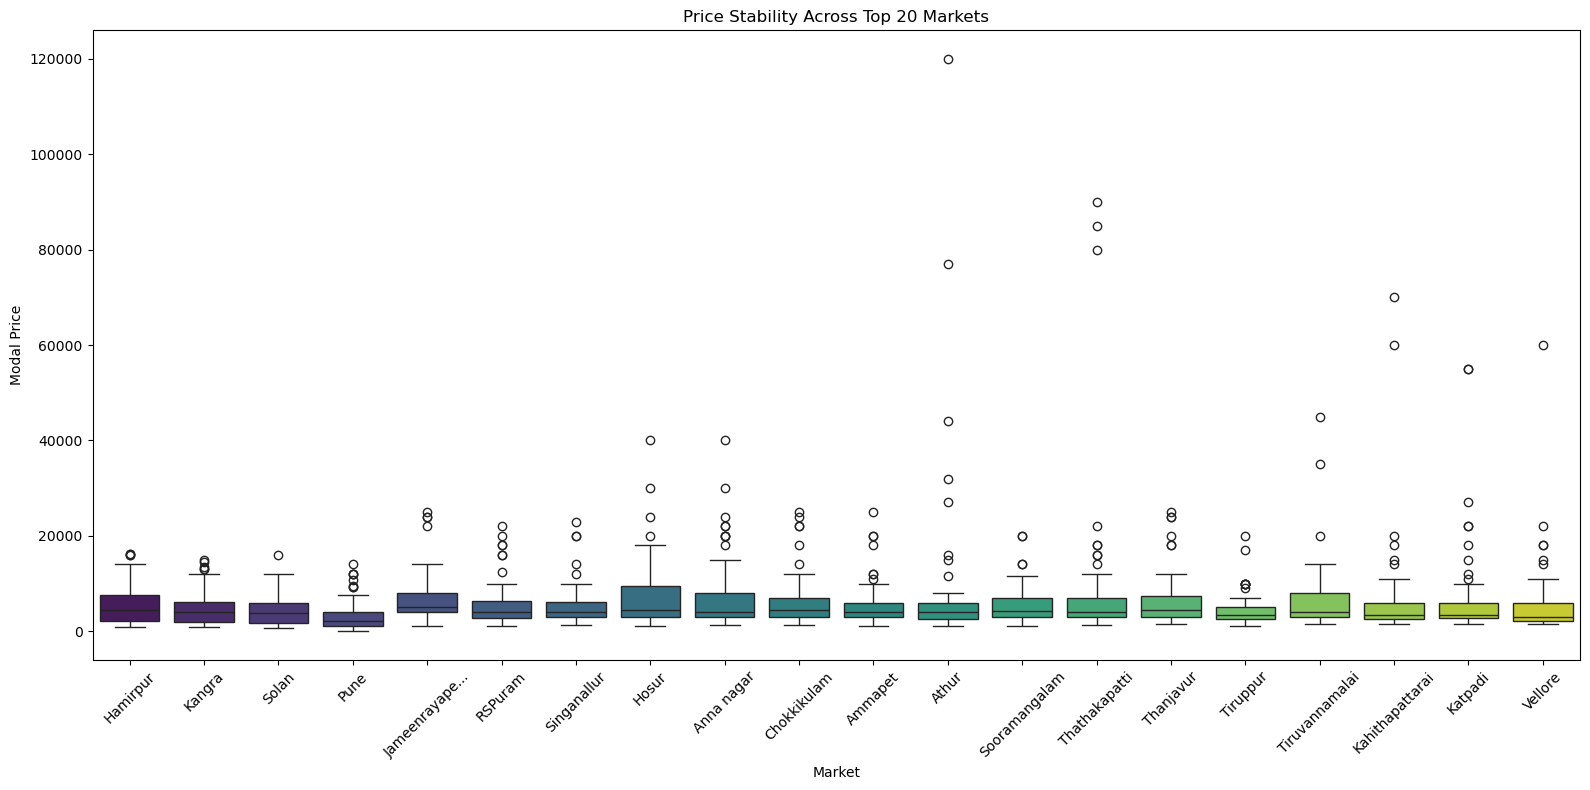

In [9]:

# Create a shortened version of Market names
df['Market_Short'] = df['Market'].apply(lambda x: x if len(x) <= 15 else x[:12] + '...')

# Get top 20 markets by frequency
top_markets = df['Market'].value_counts().head(20).index

# Filter the data for only top 20 markets
subset_df = df[df['Market'].isin(top_markets)].copy()

# Recompute Market_Short for the subset (optional but safe)
subset_df['Market_Short'] = subset_df['Market'].apply(lambda x: x if len(x) <= 15 else x[:12] + '...')

# Plotting boxplot for price stability
plt.figure(figsize=(16, 8))
sns.boxplot(data=subset_df, x='Market_Short', y='Modal_Price', hue='Market_Short', palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title('Price Stability Across Top 20 Markets')
plt.xlabel('Market')
plt.ylabel('Modal Price')
plt.tight_layout()
plt.show()


OBJECTIVE 3: COMMODITY-WISE PRICE DISTRIBUTION
 Analyzing how prices vary across different commodities.

/var/folders/xr/fbj5qw5170ngq34kg46mb12h0000gn/T/ipykernel_18739/2526419244.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=subset_df, x='Commodity', y='Modal_Price', palette='viridis')


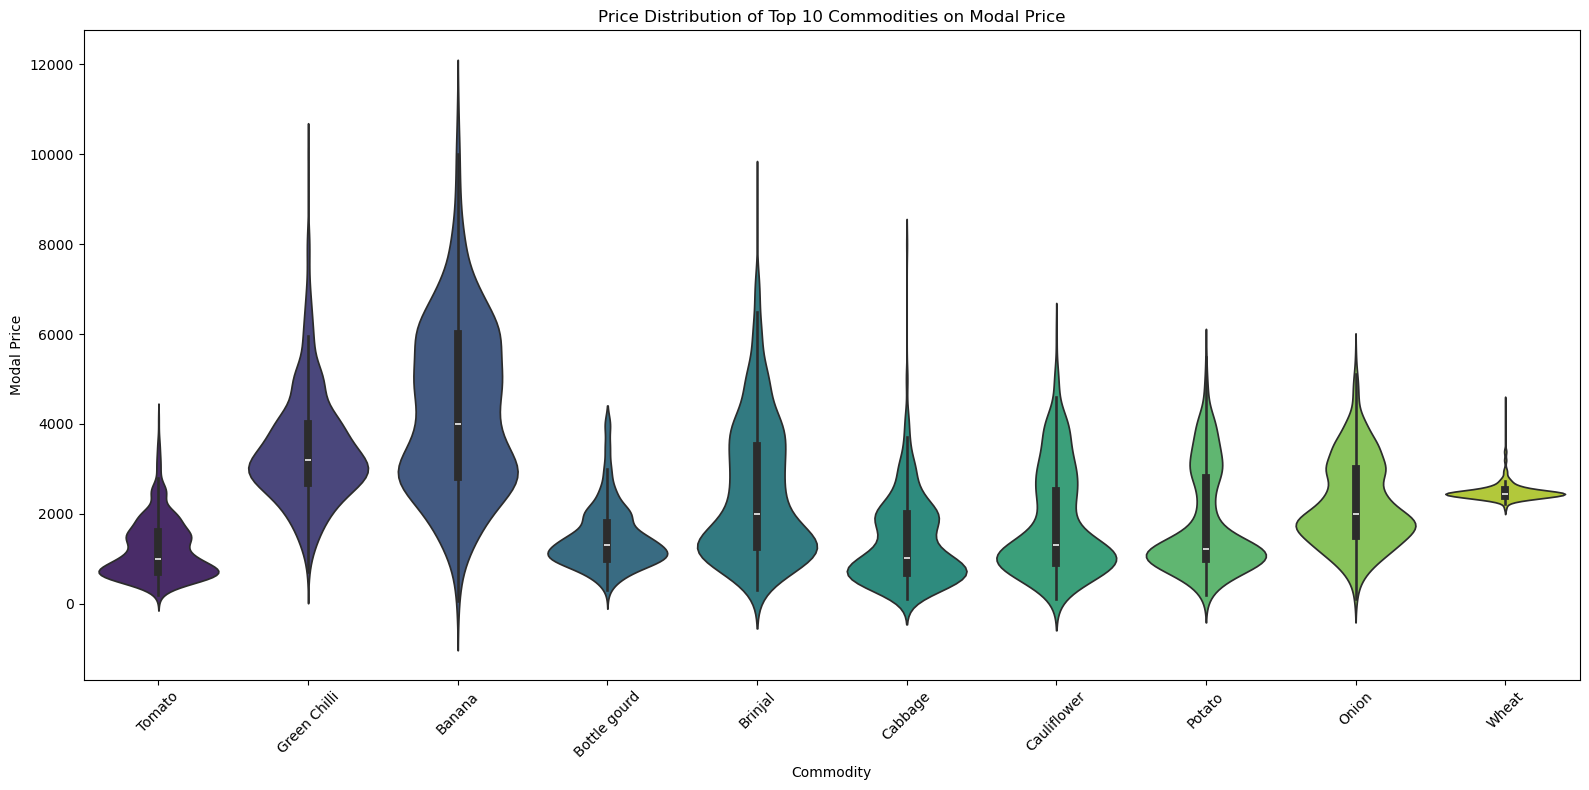

In [10]:
# Step 1: Get top 10 commodities by frequency
top_commodities = df['Commodity'].value_counts().head(10).index

# Step 2: Filter the dataframe
subset_df = df[df['Commodity'].isin(top_commodities)]

# Step 3: Plot the violin plot
plt.figure(figsize=(16, 8))
sns.violinplot(data=subset_df, x='Commodity', y='Modal_Price', palette='viridis')
plt.xticks(rotation=45)
plt.title('Price Distribution of Top 10 Commodities on Modal Price')
plt.xlabel('Commodity')
plt.ylabel('Modal Price')
plt.tight_layout()
plt.show()

OBJECTIVE 4: ROLE OF MARKET TYPE(GRADE) IN PRICING ACROSS COMMODITIES
Analyzing how different market types (represented by Grades) influence the pricing of various commodities.

In [11]:
df['Grade'].unique()

array(['FAQ', 'Large', 'Non-FAQ', 'Local', 'Medium', 'Small'],
      dtype=object)

In [15]:
df['Commodity'].nunique()

219

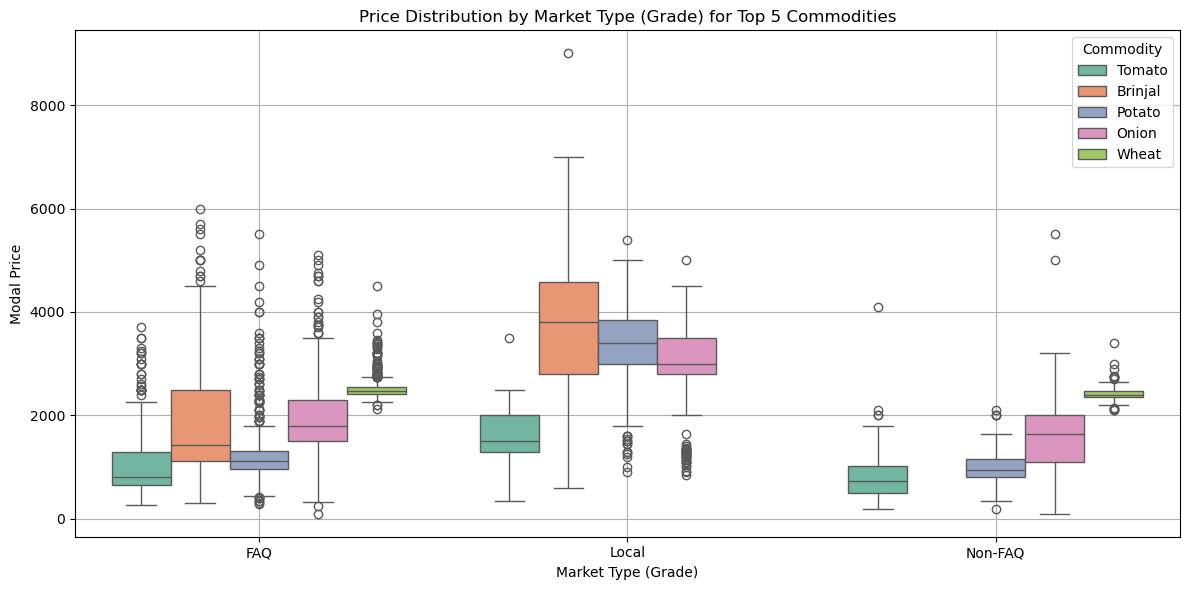

In [16]:

# top 5 commodities taken to avoid cluster
top_commodities = df['Commodity'].value_counts().head(5).index
filtered_df = df[df['Commodity'].isin(top_commodities)]

plt.figure(figsize=(12, 6))

sns.boxplot(data=filtered_df, x='Grade', y='Modal_Price', hue='Commodity', palette='Set2')

plt.title('Price Distribution by Market Grade for Top 5 Commodities')
plt.xlabel('Market Type (Grade)')
plt.ylabel('Modal Price')
plt.legend(title='Commodity', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


OBJECTIVE 5: PRICE STABILITY INDEX
Identifying which commodities have the most and least stable prices across all markets.

/var/folders/xr/fbj5qw5170ngq34kg46mb12h0000gn/T/ipykernel_18739/2183873320.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=selected, x='Commodity', y='Price StdDev', palette='Blues_r')


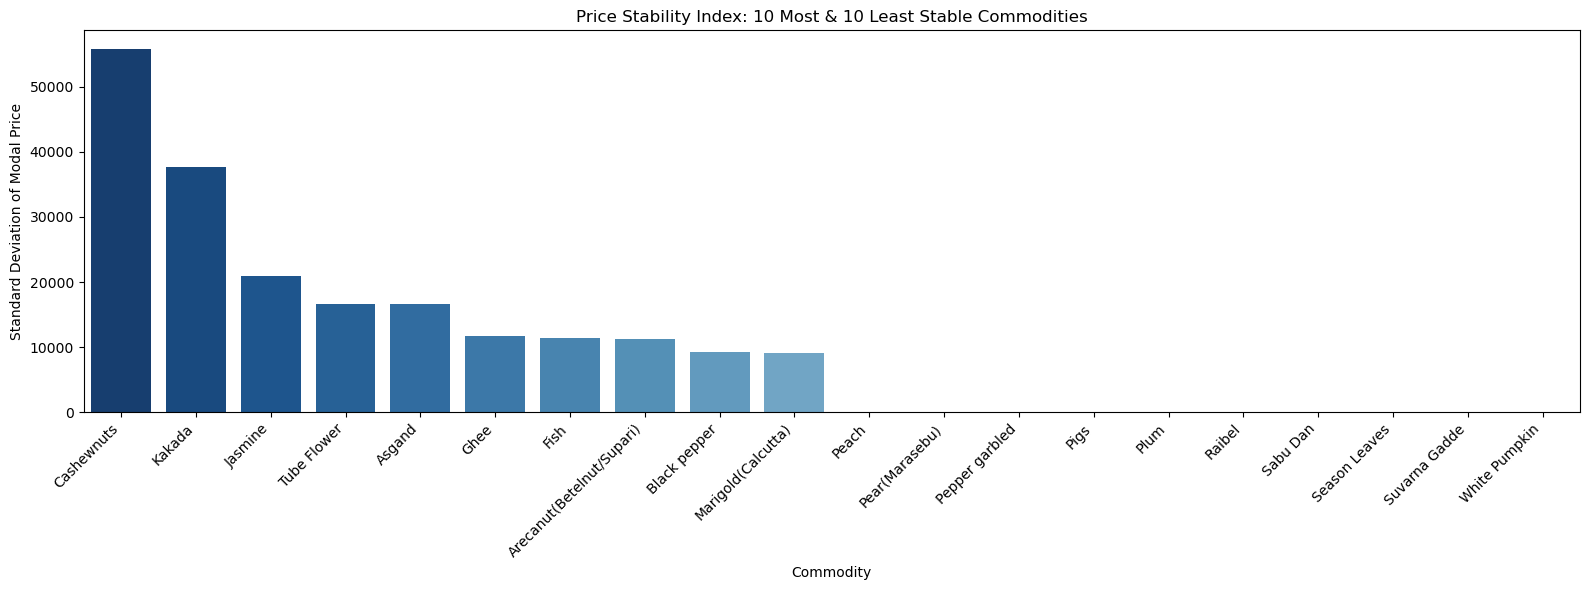

In [22]:
# Step 1: Compute standard deviation of modal prices for each commodity
price_std = df.groupby('Commodity')['Modal_Price'].std().sort_values(ascending=False)

# Step 2: Get exactly top 10 and bottom 10 (no overlap)
top_10 = price_std.head(10)
bottom_10 = price_std[~price_std.index.isin(top_10.index)].tail(10)

# Step 3: Combine for plotting
selected = pd.concat([top_10, bottom_10]).reset_index()
selected.columns = ['Commodity', 'Price StdDev']

# Step 4: Plot
plt.figure(figsize=(16,6))
sns.barplot(data=selected, x='Commodity', y='Price StdDev', palette='Blues_r')
plt.xticks(rotation=45, ha='right')
plt.title('Price Stability Index: 10 Most & 10 Least Stable Commodities')
plt.ylabel('Standard Deviation of Modal Price')
plt.xlabel('Commodity')
plt.tight_layout()
plt.show()


OBJECTIVE 6: MARKET-WISE PRICE VOTALITY ANALYSIS
Analyzing the average price volatility across different markets by calculating the range between maximum and minimum prices

/var/folders/xr/fbj5qw5170ngq34kg46mb12h0000gn/T/ipykernel_18739/80654119.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volatility_df.values, y=volatility_df.index, palette='magma')


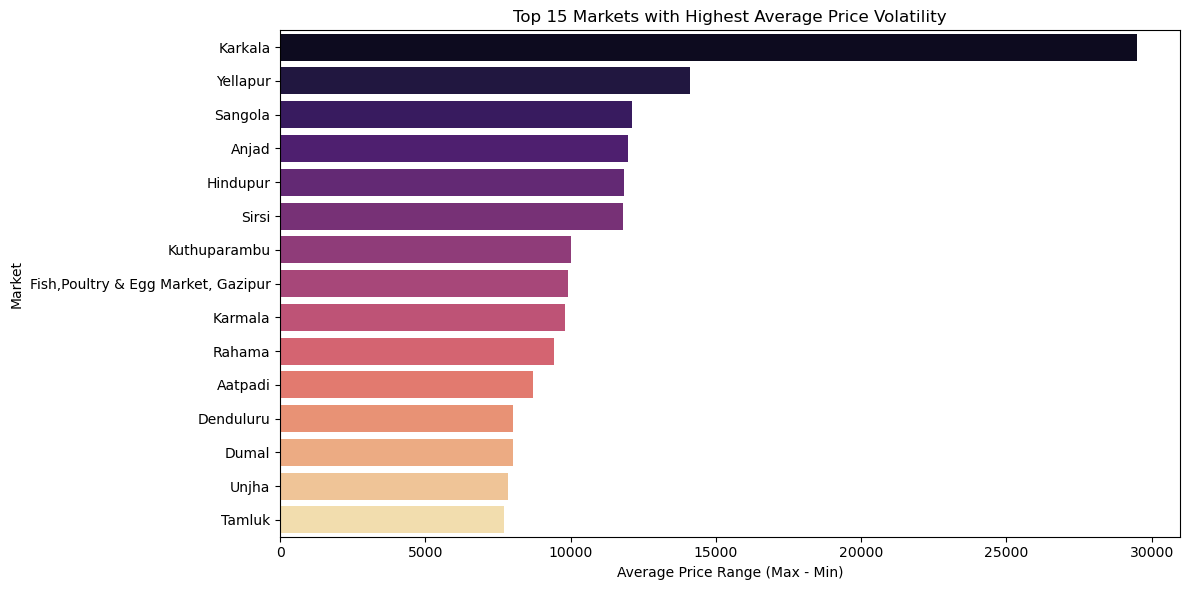

In [31]:
df['Price_Range'] = df['Max_Price'] - df['Min_Price']

# Step 2: Group by Market and calculate average volatility
volatility_df = df.groupby('Market')['Price_Range'].mean().sort_values(ascending=False).head(15)

# Step 3: Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=volatility_df.values, y=volatility_df.index, palette='magma')
plt.title('Top 15 Markets with Highest Average Price Volatility')
plt.xlabel('Average Price Range (Max - Min)')
plt.ylabel('Market')
plt.tight_layout()
plt.show()

